# IMDB Film Reviews: Sentiment Analysis

## EDA & Pre-processing

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data


### 1. Importing dependencies and loading in dataset

In [1]:
# importing dependencies
import pandas as pd 
import re, string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 2. EDA

In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


We have a total count of **50000** reviews, but only **49582** unique values. 

That signifies we have some duplicates, let's get rid of those.

In [4]:
df.drop_duplicates(inplace=True) # dropping duplicate reviews
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


Let's check how balanced the data is for our target feature (sentiment):

positive    24884
negative    24698
Name: sentiment, dtype: int64


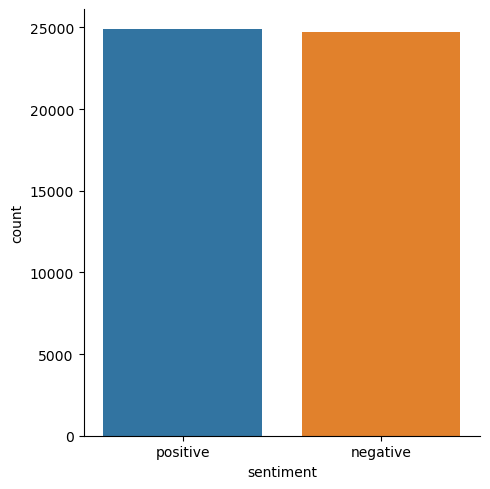

In [5]:
sns.catplot(df, x='sentiment', kind='count')
print(df['sentiment'].value_counts())

As shown below, we can see that likely due to being scraped, the reviews contain HTML that will need to be removed.

In [6]:
df['review'].iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

### 3. Pre-processing

3.1 Lowercasing

In [7]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


3.2 Removing HTML, URLs,  punctuations, and Emojis

In [9]:
# returns text stripped of html
def remove_html(text):
    pattern = re.compile('<.*?>')
    text = pattern.sub(r'', text)
    return text


# remove urls
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    text = pattern.sub(r'', text)
    return text


# returns text stripped of special characters
punc = string.punctuation
def remove_special_char(text):
    text = text.translate(str.maketrans('', '', punc))
    return text

# returns text stripped of emojis
def remove_emojis(text):
    pattern = re.compile("["
                             u"\U0001F600-\U0001F64F" #emoticons
                             u"\U0001F300-\U0001F5FF" #symbols, pictograph
                              u"\U0001F680-\U0001F6FF" #transport and map symbol
                              u"\U0001F1E0-\U0001F1FF" # flags(IOS)
                              u"\U00002702-\U000027B0"
                              u"\U00002FC2-\U0001F251"
                             "]+",flags=re.UNICODE)
    return pattern.sub(r' ', text)


# returns next stripped of digits
def remove_digits(text):
    pattern = re.compile('\d')
    text = pattern.sub(r'',text)
    return text
    

# returns clean text
def clean_text(text):
    text = remove_html(text)
    text = remove_urls(text)
    text = remove_special_char(text)
    text = remove_emojis(text)
    text = remove_digits(text)
    return text


df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


3.3 Removing stop words

In [10]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append(' ')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

df['review']= df['review'].apply(remove_stopwords)
df.head()


,review,sentiment
0,one reviewers mentioned watching ...,positive
1,wonderful little production filming techni...,positive
2,thought wonderful way spend time ...,positive
3,basically theres family little boy jake ...,negative
4,petter matteis love time money visua...,positive


Now that the data is clean, we can visualize the words associated with positive and negative sentiment using __wordclouds__

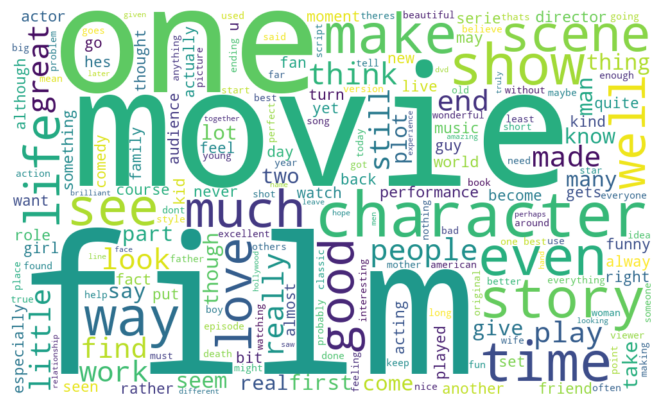

In [11]:
# gets all rows with positive sentiment
pos = df.loc[df['sentiment']== 'positive']['review']
# all postive reviews concatenated into 1 string
pos_words = pos.str.cat(sep=' ')
wordcloud_pos = WordCloud(width = 1000, height=600, background_color='white').generate(pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

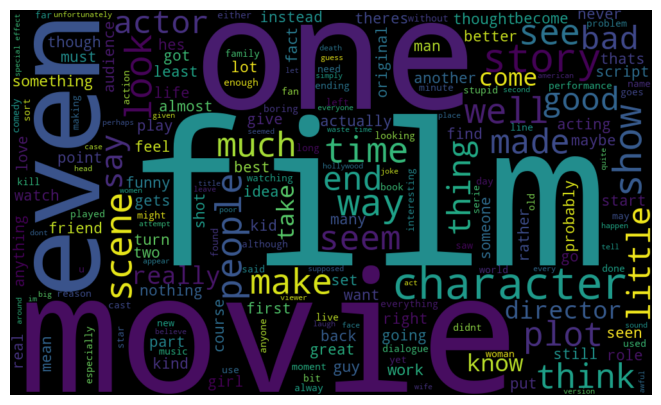

In [12]:
# gets all rows with negative sentiment
neg = df.loc[df['sentiment']=='negative']['review']
# all negative reviews concatenated into 1 string
neg_words = neg.str.cat(sep=' ')
wordcloud_neg = WordCloud(width = 1000, height=600, background_color='black').generate(neg_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
stemmer = PorterStemmer()
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['review'] = df['review'].apply(stemming)
df.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


As we can see, there is an incredible amount of overlap in words for both positive and negative review and therefore our wordclouds are not providing much meaningful insight.

Let's look at the most frequent words that both sentiment values have in common, remove them, and then rebuild our clouds to see if we get better insight.

First let's see what words are most frequent.

In [15]:
# Building list of 50 most common words for both sentiment values

# gets all rows with positive sentiment
pos = df.loc[df['sentiment']== 'positive']['review']
# all postive reviews concatenated into 1 string
pos_words = pos.str.cat(sep=' ')
# tokenize 
pos_words_tokens = pos_words.split(' ')
# calculate frequency
pos_fdist = FreqDist(pos_words_tokens)
# make list of 50 most frequent words
most_freq_pos_words = []
for word, freq in pos_fdist.most_common(50):
    most_freq_pos_words.append(word)

# gets all rows with negative sentiment
neg = df.loc[df['sentiment']== 'negative']['review']
# all postive reviews concatenated into 1 string
neg_words = neg.str.cat(sep=' ')
# tokenize
neg_words_tokens = neg_words.split(' ')
# calculate frequency 
neg_fdist = FreqDist(neg_words_tokens)
# make list of 50 most frequent words
most_freq_neg_words = []
for word, freq in neg_fdist.most_common(50):
    most_freq_neg_words.append(word)

# print(most_freq_pos_words)
# print(most_freq_neg_words)
# remove redundant space 
most_freq_neg_words.pop(0)
most_freq_pos_words.pop(0)

print(most_freq_pos_words)
print(most_freq_neg_words)

['movi', 'one', 'like', 'time', 'see', 'good', 'stori', 'charact', 'make', 'great', 'get', 'watch', 'love', 'well', 'show', 'realli', 'also', 'would', 'play', 'scene', 'even', 'much', 'first', 'end', 'peopl', 'way', 'think', 'best', 'go', 'look', 'mani', 'life', 'year', 'work', 'know', 'made', 'two', 'thing', 'perform', 'take', 'seen', 'act', 'dont', 'say', 'come', 'littl', 'man', 'still', 'never']
['film', 'one', 'like', 'make', 'get', 'even', 'watch', 'good', 'time', 'bad', 'charact', 'would', 'see', 'realli', 'look', 'scene', 'stori', 'act', 'dont', 'much', 'go', 'end', 'peopl', 'thing', 'could', 'think', 'show', 'made', 'say', 'plot', 'way', 'seem', 'first', 'know', 'well', 'tri', 'want', 'play', 'actor', 'also', 'never', 'better', 'seen', 'come', 'ever', 'take', 'two', 'littl', 'work']


Now let's which of these words provide little value since they are common in both classes.

In [16]:
words_in_common = []
for word in most_freq_pos_words:
    if word in most_freq_pos_words:
        words_in_common.append(word)
print(words_in_common)

['movi', 'one', 'like', 'time', 'see', 'good', 'stori', 'charact', 'make', 'great', 'get', 'watch', 'love', 'well', 'show', 'realli', 'also', 'would', 'play', 'scene', 'even', 'much', 'first', 'end', 'peopl', 'way', 'think', 'best', 'go', 'look', 'mani', 'life', 'year', 'work', 'know', 'made', 'two', 'thing', 'perform', 'take', 'seen', 'act', 'dont', 'say', 'come', 'littl', 'man', 'still', 'never']


Defining a function to remove these words.

In [17]:
def remove_words_in_common(corpus):
    for word in words_in_common:
        corpus = corpus.replace(word, '')
    return corpus

Now let's rebuild our clouds.
Positive cloud:

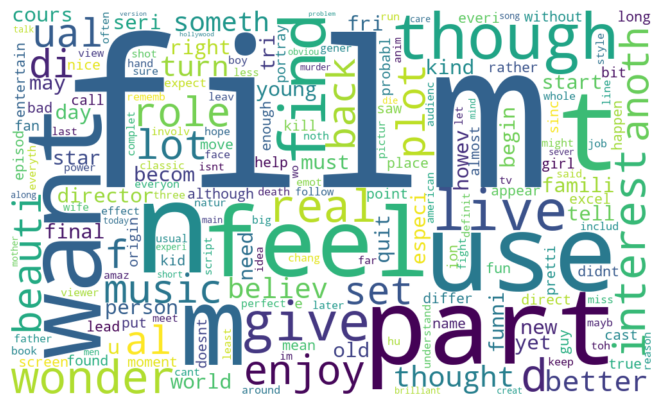

In [18]:
# gets all rows with positive sentiment
pos = df.loc[df['sentiment']== 'positive']['review']
# all postive reviews concatenated into 1 string
pos_words = pos.str.cat(sep=' ')
# removing words in common
pos_words = remove_words_in_common(pos_words)
wordcloud_pos = WordCloud(width = 1000, height=600, background_color='white').generate(pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

Negative cloud:

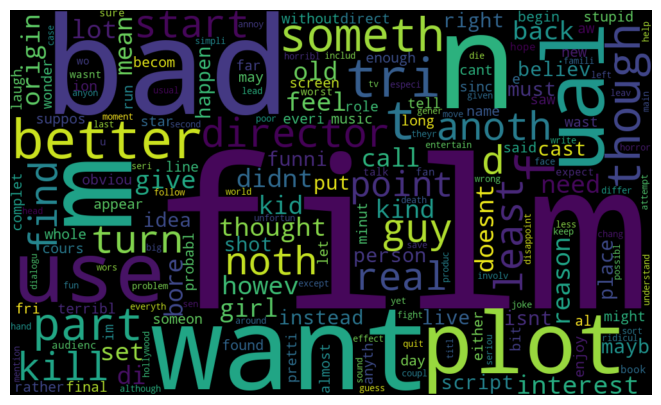

In [19]:
# gets all rows with negative sentiment
neg = df.loc[df['sentiment']=='negative']['review']
# all negative reviews concatenated into 1 string
neg_words = neg.str.cat(sep=' ')
# removing words in common
neg_words = remove_words_in_common(neg_words)
wordcloud_neg = WordCloud(width = 1000, height=600, background_color='black').generate(neg_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

3.4 Stemmimg

In [ ]:
stemmer = PorterStemmer()
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['review'] = df['review'].apply(stemming)
df.head()


3.5 Encoding target variable 'sentiment' with 1 meaning positive and 0 meaning negative

In [ ]:
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.head()


,review,sentiment
0,one reviewers mentioned watching ...,1
1,wonderful little production filming techni...,1
2,thought wonderful way spend time ...,1
3,basically theres family little boy jake ...,0
4,petter matteis love time money visua...,1


#### Let's see if we get any better results building a Word Cloud after using stemming:

__Positive__ Review Word Cloud: Post Stemming

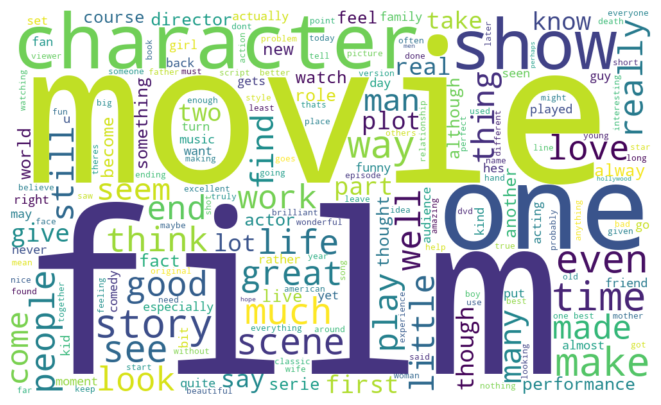

In [ ]:
# gets all rows with positive sentiment
pos = df.loc[df['sentiment']== 1]['review']
# all postive reviews concatenated into 1 string
pos_words = pos.str.cat(sep=' ')
wordcloud_pos = WordCloud(width = 1000, height=600, background_color='white').generate(pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()


__Negative__ Review Word Cloud: Post Stemming

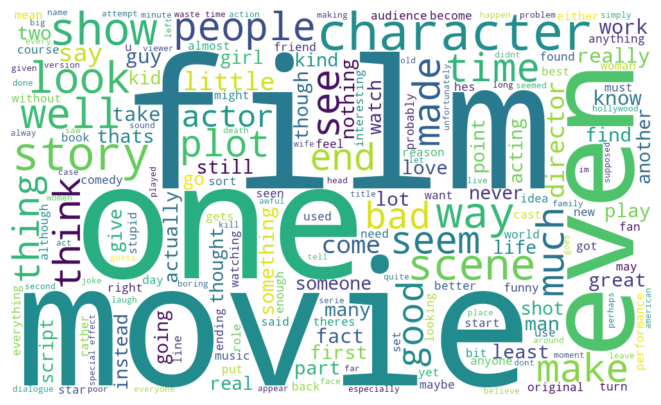

In [ ]:
# gets all rows with negative sentiment
pos = df.loc[df['sentiment']== 0]['review']
# all negative reviews concatenated into 1 string
pos_words = pos.str.cat(sep=' ')
wordcloud_pos = WordCloud(width = 1000, height=600, background_color='white').generate(pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

3.6 Exporting processed data

In [ ]:
df.shape
#df.to_csv('processed_IMDb_reviews.csv', index=False)